<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [54]:
import pandas as pd
import psycopg2

In [55]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [56]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [57]:
query = f'''
SELECT
    COUNT(*) "Количество вакансий"
FROM VACANCIES
'''

In [58]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [59]:
query = f'''
SELECT
    COUNT(*) "Количество работодателей"
FROM employers
'''

In [60]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [61]:
query = f'''
SELECT
    COUNT(*) "Количество регионов"
FROM areas
'''

In [62]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [63]:
query = f'''
SELECT
    COUNT(*) "Количество сфер деятельности"
FROM industries
'''

In [64]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Количество сфер деятельности
0,294


***

Выводы: количество вакансий в два раза больше количества работодателей.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [65]:
query = f'''
SELECT
    a.name area,
    COUNT(*) cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
GROUP BY a.id
ORDER BY 2 DESC
'''

In [66]:
df = pd.read_sql_query(query, connection)
df.head(20)

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3163632103.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [67]:
query = f'''
SELECT 
    COUNT(*) "Кол. вакансий с указанной ЗП"
FROM vacancies v 
WHERE
    v.salary_from is not NULL
    OR
    v.salary_to is not NULL
'''

In [68]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Кол. вакансий с указанной ЗП
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [69]:
query = f'''
SELECT 
    ROUND(AVG(v.salary_from)) "Ср. зн. для нижней гр. зарпл. вилки",
    ROUND(AVG(v.salary_to)) "Ср. зн. для верхней гр. зарпл. вилки"
FROM vacancies v
'''

In [70]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Ср. зн. для нижней гр. зарпл. вилки,Ср. зн. для верхней гр. зарпл. вилки
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [71]:
query = f'''
SELECT
    v.schedule "Рабочий график",
    v.employment "Тип трудоустройства",
    COUNT(*) "Количество вакансий"
FROM vacancies v
GROUP BY
    v.schedule,
    v.employment
ORDER BY 3 DESC
'''

In [72]:
df = pd.read_sql_query(query, connection)
df 

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3451446100.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Рабочий график,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [73]:
query = f'''
SELECT 
    v.experience "Требуемый опыт работы",
    COUNT(*) "Количество вакансий"
FROM vacancies v
GROUP BY 
    v.experience
ORDER BY 2
'''

In [74]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


<AxesSubplot: ylabel='Количество вакансий'>

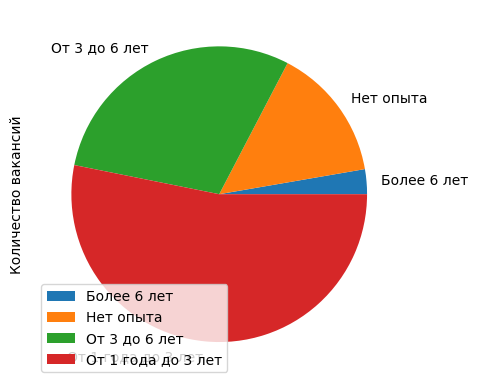

In [75]:
df.set_index('Требуемый опыт работы', inplace=True)
df.plot.pie(y = 'Количество вакансий')

***

Выводы: 
+ чем крупнее регион, тем больше там вакансий;
+ в половине вакансий не указаны границы зарплатной вилки;
+ 90000 - средняя зарплата по всем указанным вакансиям;
+ классическая связка "Полный день - Полная занятость" во много раз опережают другие сочетания *рабочего графика* и *типа трудоустройства*;
+ большая часть работодателей ищет кандидатов с небольшим опытом работы. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [76]:
query = f'''
SELECT
    e.name "Работодатель",
    COUNT(*) "Количество вакансий"
FROM vacancies v
JOIN employers e ON v.employer_id = e.id
GROUP BY 
    e.id
ORDER BY 2 DESC
'''

In [77]:
df = pd.read_sql_query(query, connection)
df.head(20)

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3163632103.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Работодатель,Количество вакансий
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [78]:
query = f'''
SELECT 
    a.name as "Название региона",
    COUNT(distinct e.id) as "Количество работодателей"
FROM   
    public.AREAS a
LEFT JOIN public.EMPLOYERS e ON e.area = a.id
LEFT JOIN public.VACANCIES v ON v.area_id = a.id
WHERE v.id is NULL
GROUP BY a.name
ORDER BY 2 DESC
LIMIT 1
'''

In [79]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Название региона,Количество работодателей
0,Россия,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [80]:
query = f'''
SELECT
    e.name "Имя компании",
    COUNT(DISTINCT v.area_id) "Количество регионов"
FROM employers e
LEFT JOIN vacancies v ON e.id = v.employer_id
GROUP BY 
    e.id
ORDER BY 2 DESC
'''

In [81]:
df = pd.read_sql_query(query, connection)
df.head(20)

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3163632103.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Имя компании,Количество регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [82]:
query = f'''
SELECT
    COUNT(*) "Кол. работодателей без сф. деят."
FROM employers e 
LEFT JOIN employers_industries ei ON ei.employer_id = e.id

WHERE ei.employer_id IS NULL
'''

In [83]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Кол. работодателей без сф. деят.
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [84]:
query = f'''
SELECT
    e.name
FROM employers e 
LEFT JOIN employers_industries ei ON ei.employer_id = e.id
GROUP BY
    e.id
HAVING
    COUNT(*) = 4
ORDER BY 1
OFFSET 2 LIMIT 1
'''

In [85]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [86]:
query = f'''
SELECT
    COUNT(*)
FROM employers e 
LEFT JOIN employers_industries ei ON ei.employer_id = e.id
JOIN industries i ON i.id = ei.industry_id
WHERE i.name = 'Разработка программного обеспечения'

'''

In [87]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [88]:
import requests
from bs4 import BeautifulSoup

# Список городов-миллионеров
list_megacity = [] 
# Получаем список городов-миллионеров через
response = requests.get('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
page = BeautifulSoup(response.text,'html.parser')
for x in page.body.find('table', class_="standard sortable").find('tbody').find_all('tr'):
    for i, y in enumerate(x.find_all('td')):
        if i == 1:
            list_megacity.append(y.text)

# Убираем         
list_megacity = str(list_megacity)[1:-1]
print(list_megacity)


'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'


In [89]:
query = f'''
SELECT
    a.name,
    COUNT(*)
FROM vacancies v
JOIN employers e ON v.employer_id = e.id
JOIN areas a ON v.area_id = a.id
WHERE
    e.name = 'Яндекс'
    AND a.name IN ({list_megacity})
GROUP BY
    a.id
    
UNION ALL
SELECT
    'Total',
    COUNT(*)
FROM vacancies v
JOIN employers e ON v.employer_id = e.id
JOIN areas a ON v.area_id = a.id
WHERE
    e.name = 'Яндекс'
    AND a.name IN ({list_megacity})

ORDER BY 2
'''

In [90]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

Выводы.
+ Пятерка лидеров по количеству вакансий: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть.
+ Компания Яндекс публикует свои вакансии в большом количестве регионов, так же среди лидеров в этом показателе неизвестные Спецремонт, Поляков Денис Иванович, ООО ЕФИН.
+ 8419 из 23501 работодателей не указали сферу деятельности, в будущем это может повлиять на какую-нибудь статистику.
+ Распределение количества вакансий от Яндекс в городах-миллионниках достаточно равномерное, хоть и в лидерах Москва и Санкт-Питербург. Это делает Яндекс привлекательной для соискателей.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [91]:
query = f'''
SELECT
    COUNT(*)
FROM VACANCIES v 
WHERE LOWER(v.name) LIKE '%data%%' 
    OR LOWER(v.name) LIKE '%данн%'
     
'''

In [92]:
df = pd.read_sql_query(query, connection)
print(f'{df.iloc[0][0]} - столько вакансий имеет отношение к данным')

1771 - столько вакансий имеет отношение к данным


C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\2181351417.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [93]:
query = f'''
SELECT
    COUNT(*)
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
    AND 
    (LOWER(v.name) LIKE '%junior%'
    OR LOWER(v.experience) LIKE '%нет опыта%'
    OR LOWER(v.employment) LIKE '%стажировка%')
'''

In [94]:
df = pd.read_sql_query(query, connection)
print(f'{df.iloc[0][0]} - столько вакансий для начинающего дата-сайентиста')

51 - столько вакансий для начинающего дата-сайентиста


C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\2808367699.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [95]:
query = f'''
SELECT
    COUNT(*)
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
    AND
    (LOWER(v.key_skills) LIKE '%sql%'
    OR LOWER(v.key_skills) LIKE '%postgres%')
'''

In [96]:
df = pd.read_sql_query(query, connection)
print(f'SQL или postgres указаны в {df.iloc[0][0]} вакансиях DS')

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\2216032196.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


SQL или postgres указаны в 201 вакансиях DS


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [97]:
query = f'''
SELECT
    COUNT(*)
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
    AND
    (LOWER(v.key_skills) LIKE '%python%')
'''

In [98]:
df = pd.read_sql_query(query, connection)
print(f'Python указан в {df.iloc[0][0]} вакансиях DS')

Python указан в 351 вакансиях DS


C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3305081555.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [99]:
query = f'''
SELECT
    v.key_skills
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
'''

In [100]:
df = pd.read_sql_query(query, connection)
df['count_key_skills'] = df['key_skills'].apply(lambda x: len(x.split('\t')) if x is not None else None)
result = round(df['count_key_skills'].mean(),2)
print(f'В среднем в вакансиях для DS указывают {result} ключевых навыков.')

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\887501619.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


В среднем в вакансиях для DS указывают 6.41 ключевых навыков.


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [101]:
query = f'''
SELECT
     v.experience experience,
     ROUND(AVG(COALESCE((v.salary_from + v.salary_to)/2,v.salary_from,v.salary_to))) AS salary
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
     OR LOWER(v.name) LIKE '%data%science%'
     OR LOWER(v.name) LIKE '%исследователь%данных%'
     OR LOWER(v.name) LIKE '%machine%learning%'
     OR LOWER(v.name) LIKE '%машинн%обучен%'
     OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
     AND
     ((v.salary_from is not NULL
     AND v.salary_to is not NULL)
     OR 
     (v.salary_from is not NULL
     AND v.salary_to is NULL)
     OR
     (v.salary_from is NULL
     AND v.salary_to is not NULL))
GROUP BY
     v.experience
'''


In [102]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Выводы. 
+ Исследуя вакансии для дата-сайентиста можно прийти к выводу, что эта профессия востребована на рынке труда. 
+ Хороший процент вакансий подходит для начинающего дата-сайентиста. 
+ Знание Python и SQL облегчают трудоустройство.
+ Средняя ЗП дата-сайентиста выше средней ЗП по всем вакансиям.

# Общий вывод по проекту

In [103]:
# Количество вакансий для дата-сайентиста в разных городах
query = f'''
SELECT
     a.name "Город",
     COUNT(*) "Количество вакансий"
FROM VACANCIES v
JOIN AREAS a ON v.area_id = a.id
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
GROUP BY
     a.id
ORDER BY 2 DESC 
LIMIT 10
'''

In [104]:
df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Город,Количество вакансий
0,Москва,219
1,Санкт-Петербург,65
2,Новосибирск,23
3,Нижний Новгород,20
4,Алматы,16
5,Казань,16
6,Минск,9
7,Томск,8
8,Екатеринбург,7
9,Армения,6


In [105]:
# Количество вакансий для дата-сайентиста для каждого сочетания типа рабочего графика (schedule) 
# и типа трудоустройства (employment)
query = f'''
SELECT
    v.schedule "Рабочий график",
    v.employment "Тип трудоустройства",
    COUNT(*) "Количество вакансий"
FROM vacancies v
JOIN AREAS a ON v.area_id = a.id
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
    OR LOWER(v.name) LIKE '%data%science%'
    OR LOWER(v.name) LIKE '%исследователь%данных%'
    OR LOWER(v.name) LIKE '%machine%learning%'
    OR LOWER(v.name) LIKE '%машинн%обучен%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
GROUP BY
    v.schedule,
    v.employment
ORDER BY 3 DESC
'''

df = pd.read_sql_query(query, connection)
df

C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\3084210580.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Рабочий график,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,320
1,Удаленная работа,Полная занятость,111
2,Гибкий график,Полная занятость,37
3,Гибкий график,Частичная занятость,4
4,Удаленная работа,Частичная занятость,3
5,Удаленная работа,Проектная работа,3
6,Полный день,Стажировка,2
7,Гибкий график,Стажировка,2
8,Полный день,Частичная занятость,1


C:\Users\sasa\AppData\Local\Temp\ipykernel_10500\533718815.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


<AxesSubplot: title={'center': 'Требуемый опыт работы'}, ylabel='Количество вакансий'>

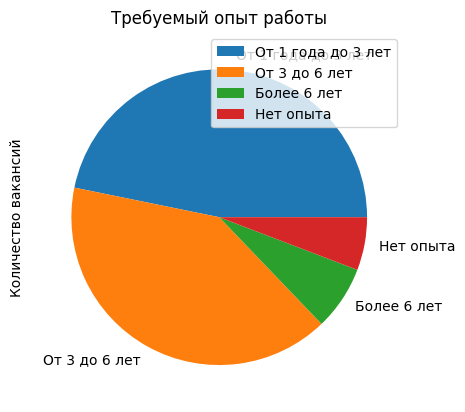

In [106]:
query = f'''
SELECT
     v.experience "Требуемый опыт работы",
     COUNT(*) "Количество вакансий"
FROM VACANCIES v 
WHERE (LOWER(v.name) LIKE '%data%scientist%' 
     OR LOWER(v.name) LIKE '%data%science%'
     OR LOWER(v.name) LIKE '%исследователь%данных%'
     OR LOWER(v.name) LIKE '%machine%learning%'
     OR LOWER(v.name) LIKE '%машинн%обучен%'
     OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
GROUP BY
     v.experience
ORDER BY 2 DESC
'''

df = pd.read_sql_query(query, connection)
df

df.set_index('Требуемый опыт работы', inplace=True)
df.plot.pie(y = 'Количество вакансий',  title = 'Требуемый опыт работы')

Факторы, которые влияют на возможность найти работу дата-сайентисту:
+ Рабочий график и тип трудоустройства
+ Регион 
+ Опыт работы
+ Набор ключевых навыков

Хорошо бы найти данные отображающее готовность работодателя предоставить жильё для переезда. Можно более детально изучить работодателей, у кого какие требования к работникам и общее количество вакансий. Можно поискать базу данных с отзывами о работодателях и профессии. 